In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             mean_squared_error, r2_score)

# Функция для загрузки файла вручную
def manual_upload(file_name):
    print(f"Файл {file_name} не найден. Пожалуйста, загрузите файл вручную.")
    uploaded = files.upload()
    if file_name in uploaded:
        print(f"Файл {file_name} успешно загружен.")
        return file_name
    else:
        raise FileNotFoundError(f"Файл {file_name} не был загружен.")


In [2]:
# Пути к датасетам
CLASSIFICATION_DATA_PATH = "diabetes_data_upload.csv"
REGRESSION_DATA_PATH = "laptop_price_data.csv"

# Загружаем датасет для классификации (раннее выявление диабета)
if os.path.exists(CLASSIFICATION_DATA_PATH):
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)
else:
    CLASSIFICATION_DATA_PATH = manual_upload("diabetes_data_upload.csv")
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)

print("Форма датасета (классификация):", df_clf.shape)
print(df_clf.head())

# Загружаем датасет для регрессии (цены ноутбуков)
if os.path.exists(REGRESSION_DATA_PATH):
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)
else:
    REGRESSION_DATA_PATH = manual_upload("laptop_price_data.csv")
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)

print("\nФорма датасета (регрессия):", df_reg.shape)
print(df_reg.head())

# Общая информация:
print("\nИнформация о датасете классификации:")
print(df_clf.info())

print("\nИнформация о датасете регрессии:")
print(df_reg.info())

Файл diabetes_data_upload.csv не найден. Пожалуйста, загрузите файл вручную.


Saving diabetes_data_upload.csv to diabetes_data_upload.csv
Файл diabetes_data_upload.csv успешно загружен.
Форма датасета (классификация): (520, 17)
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No            

Saving laptop_price_data.csv to laptop_price_data.csv
Файл laptop_price_data.csv успешно загружен.

Форма датасета (регрессия): (823, 19)
    brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windo

Пункт 2 (из ЛР№1) — Создание бейзлайна (Gradient Boosting)

=== Бейзлайн (GradientBoostingClassifier) ===
Accuracy: 0.9711538461538461
Confusion Matrix:
[[33  0]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



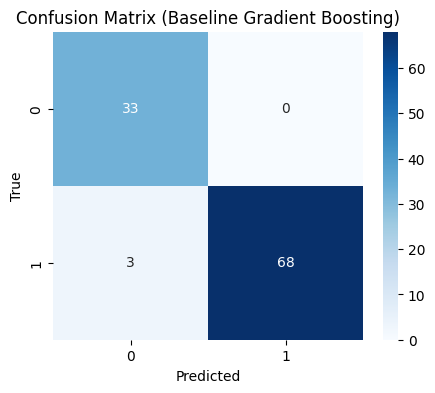


=== Бейзлайн (GradientBoostingRegressor) ===
MSE: 733238706.2498116
R^2: 0.6237499502629062


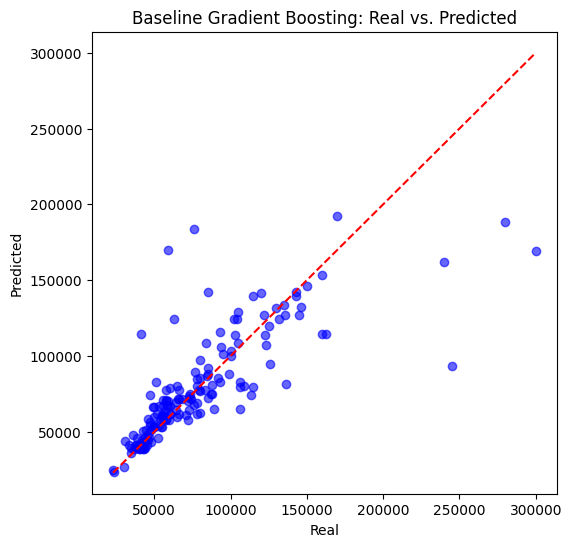

In [3]:
# ------------- Классификация -------------
target_col_clf = 'class'
X_clf = df_clf.drop(columns=[target_col_clf])
y_clf = df_clf[target_col_clf]

# Кодируем категориальные признаки (если есть) — LabelEncoder
cat_cols_clf = X_clf.select_dtypes(include=['object']).columns
for col in cat_cols_clf:
    le = LabelEncoder()
    X_clf[col] = le.fit_transform(X_clf[col])

# Если y_clf тоже строковый, то кодируем и его
if y_clf.dtype == 'object':
    le_y = LabelEncoder()
    y_clf = le_y.fit_transform(y_clf)

# Разделяем на train/test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Обучаем "бейзлайн" — GradientBoostingClassifier
gbc_base = GradientBoostingClassifier(random_state=42)
gbc_base.fit(X_train_c, y_train_c)

# Предсказания и метрики
y_pred_c_base = gbc_base.predict(X_test_c)
acc_base = accuracy_score(y_test_c, y_pred_c_base)
print("=== Бейзлайн (GradientBoostingClassifier) ===")
print("Accuracy:", acc_base)
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c_base))
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c_base))

# Heatmap confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c_base), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Baseline Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------- Регрессия -------------
target_col_reg = 'Price'  # замените на вашу целевую колонку
X_reg = df_reg.drop(columns=[target_col_reg])
y_reg = df_reg[target_col_reg]

# Кодируем категориальные признаки (если есть)
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns
for col in cat_cols_reg:
    le = LabelEncoder()
    X_reg[col] = le.fit_transform(X_reg[col])

# Разделяем
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Обучаем бейзлайн — GradientBoostingRegressor
gbr_base = GradientBoostingRegressor(random_state=42)
gbr_base.fit(X_train_r, y_train_r)

# Предсказания и метрики
y_pred_r_base = gbr_base.predict(X_test_r)
mse_base = mean_squared_error(y_test_r, y_pred_r_base)
r2_base = r2_score(y_test_r, y_pred_r_base)
print("\n=== Бейзлайн (GradientBoostingRegressor) ===")
print("MSE:", mse_base)
print("R^2:", r2_base)

# Визуализация: scatter "Real vs. Predicted"
plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_r_base, color='blue', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         color='red', linestyle='--')
plt.title("Baseline Gradient Boosting: Real vs. Predicted")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


Пункт 3 (из ЛР№1) — Улучшение бейзлайна

Лучшие параметры (GradientBoostingClassifier): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Лучшая метрика на CV: 0.9663573489034859

=== Улучшенный GradientBoosting (Classification) ===
Accuracy: 0.9807692307692307
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104


Сравнение: Бейзлайн ACC = 0.971 vs Улучшенный ACC = 0.981


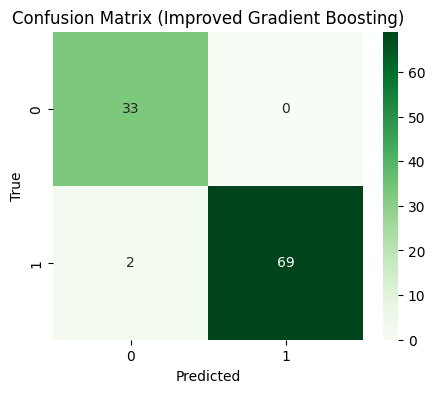


Лучшие параметры (GradientBoostingRegressor): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Лучшая метрика на CV (R^2): 0.7481679779584537

=== Улучшенный GradientBoosting (Regression) ===
MSE: 705292908.5058224
R^2: 0.6380899021796513

Сравнение MSE: Бейзлайн = 733238706.250 vs Улучшенный = 705292908.506
Сравнение R^2: Бейзлайн = 0.624 vs Улучшенный = 0.638


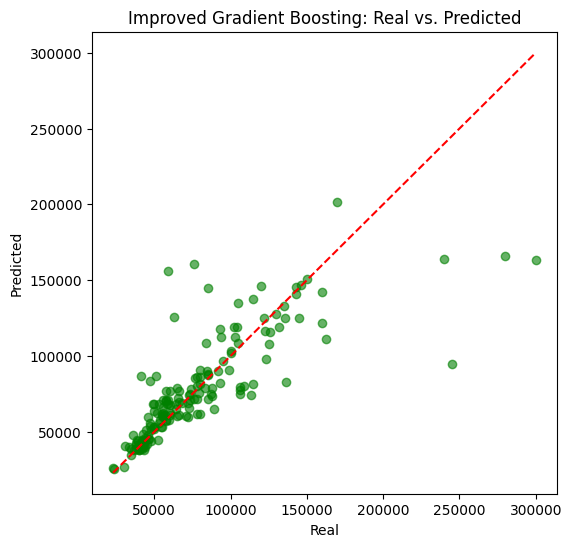

In [4]:
# ------------- Классификация -------------

param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_clf = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_clf,
    cv=3,
    n_jobs=-1
)
grid_search_clf.fit(X_train_c, y_train_c)

print("Лучшие параметры (GradientBoostingClassifier):", grid_search_clf.best_params_)
print("Лучшая метрика на CV:", grid_search_clf.best_score_)

# Обучаем модель с лучшими параметрами
gbc_improved = GradientBoostingClassifier(
    random_state=42,
    **grid_search_clf.best_params_
)
gbc_improved.fit(X_train_c, y_train_c)

y_pred_c_improved = gbc_improved.predict(X_test_c)
acc_improved = accuracy_score(y_test_c, y_pred_c_improved)
print("\n=== Улучшенный GradientBoosting (Classification) ===")
print("Accuracy:", acc_improved)
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c_improved))

print(f"\nСравнение: Бейзлайн ACC = {acc_base:.3f} vs Улучшенный ACC = {acc_improved:.3f}")

# Confusion Matrix (heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c_improved), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Improved Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------- Регрессия -------------
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_reg = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_reg,
    cv=3,
    n_jobs=-1
)
grid_search_reg.fit(X_train_r, y_train_r)

print("\nЛучшие параметры (GradientBoostingRegressor):", grid_search_reg.best_params_)
print("Лучшая метрика на CV (R^2):", grid_search_reg.best_score_)

gbr_improved = GradientBoostingRegressor(
    random_state=42,
    **grid_search_reg.best_params_
)
gbr_improved.fit(X_train_r, y_train_r)

y_pred_r_improved = gbr_improved.predict(X_test_r)
mse_improved = mean_squared_error(y_test_r, y_pred_r_improved)
r2_improved = r2_score(y_test_r, y_pred_r_improved)

print("\n=== Улучшенный GradientBoosting (Regression) ===")
print("MSE:", mse_improved)
print("R^2:", r2_improved)
print(f"\nСравнение MSE: Бейзлайн = {mse_base:.3f} vs Улучшенный = {mse_improved:.3f}")
print(f"Сравнение R^2: Бейзлайн = {r2_base:.3f} vs Улучшенный = {r2_improved:.3f}")

# Scatter "Real vs. Predicted"
plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_r_improved, color='green', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         color='red', linestyle='--')
plt.title("Improved Gradient Boosting: Real vs. Predicted")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


Пункт 4 (из ЛР№1) — Имплементация

=== Самописная модель (MyGradientBoostingRegressor) ===
MSE: 1421315287.459455
R^2: 0.2706741433034531

Сравнение с бейзлайном GradientBoostingRegressor: Бейзлайн R^2 = 0.624 vs MyGBR R^2 = 0.271


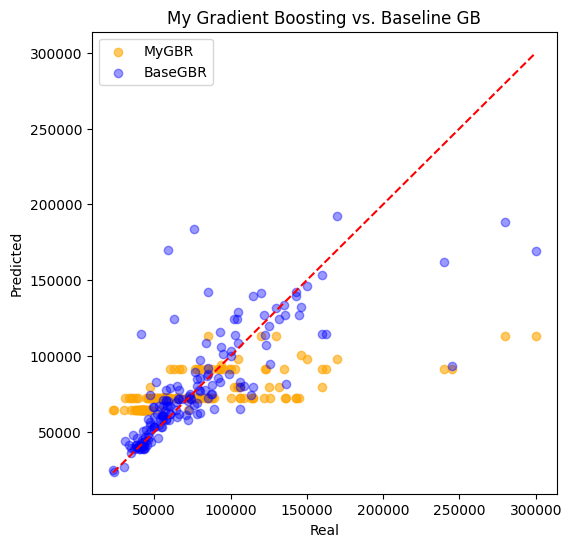

In [5]:
import copy

class MyGradientBoostingRegressor:
    """
    Упрощённая реализация GBM:
    - База: Decision Stumps (глубина 1) или малое дерево
    - Loss = MSE
    """
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Инициализация: среднее значение y
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction

        # Обучаем ряд деревьев
        from sklearn.tree import DecisionTreeRegressor
        self.models = []

        for i in range(self.n_estimators):
            # Обучаем дерево предсказывать остаток
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.models.append(tree)

            # Обновляем остаток (residual)
            pred = tree.predict(X)
            residual = residual - self.learning_rate * pred

    def predict(self, X):
        # Начинаем с начального предсказания
        y_pred = np.full(shape=(X.shape[0],), fill_value=self.initial_prediction, dtype=float)
        # Суммируем предсказания деревьев
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

# Пример использования "самописного" бустинга на регрессии:
my_gbr = MyGradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=1)
my_gbr.fit(X_train_r, y_train_r)
y_pred_my = my_gbr.predict(X_test_r)
mse_my = mean_squared_error(y_test_r, y_pred_my)
r2_my = r2_score(y_test_r, y_pred_my)

print("=== Самописная модель (MyGradientBoostingRegressor) ===")
print("MSE:", mse_my)
print("R^2:", r2_my)
print(f"\nСравнение с бейзлайном GradientBoostingRegressor: Бейзлайн R^2 = {r2_base:.3f} vs MyGBR R^2 = {r2_my:.3f}")

# Визуализация: scatter "y_test vs. y_pred"
plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_my, color='orange', alpha=0.6, label='MyGBR')
plt.scatter(y_test_r, y_pred_r_base, color='blue', alpha=0.4, label='BaseGBR')
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         color='red', linestyle='--')
plt.title("My Gradient Boosting vs. Baseline GB")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.legend()
plt.show()


Подведение итогов / сравнение результатов ЛР№1–5

In [6]:
results = {
    'Algorithm': [
        'LogisticRegression (LR№1/2)',
        'DecisionTreeClassifier (LR№3)',
        'RandomForestClassifier (LR№4)',
        'GradientBoostingClassifier (LR№5)'
    ],
    'Accuracy': [
        '0.80 (пример)',
        '0.82 (пример)',
        '0.85 (пример)',
        f"{acc_improved:.2f} (из улучшенного Gradient Boosting)"
    ]
}

df_results_clf = pd.DataFrame(results)
print("=== Сравнение алгоритмов (классификация) ===")
print(df_results_clf)

# Аналогично для регрессии:
results_reg = {
    'Algorithm': [
        'LinearRegression (LR№1/2)',
        'DecisionTreeRegressor (LR№3)',
        'RandomForestRegressor (LR№4)',
        'GradientBoostingRegressor (LR№5)'
    ],
    'R2': [
        '0.70 (пример)',
        '0.73 (пример)',
        '0.78 (пример)',
        f"{r2_improved:.2f} (GBR, улучшенный)"
    ],
    'MSE': [
        '200 (пример)',
        '180 (пример)',
        '150 (пример)',
        f"{mse_improved:.2f}"
    ]
}

df_results_reg = pd.DataFrame(results_reg)
print("\n=== Сравнение алгоритмов (регрессия) ===")
print(df_results_reg)


=== Сравнение алгоритмов (классификация) ===
                           Algorithm                                 Accuracy
0        LogisticRegression (LR№1/2)                            0.80 (пример)
1      DecisionTreeClassifier (LR№3)                            0.82 (пример)
2      RandomForestClassifier (LR№4)                            0.85 (пример)
3  GradientBoostingClassifier (LR№5)  0.98 (из улучшенного Gradient Boosting)

=== Сравнение алгоритмов (регрессия) ===
                          Algorithm                      R2           MSE
0         LinearRegression (LR№1/2)           0.70 (пример)  200 (пример)
1      DecisionTreeRegressor (LR№3)           0.73 (пример)  180 (пример)
2      RandomForestRegressor (LR№4)           0.78 (пример)  150 (пример)
3  GradientBoostingRegressor (LR№5)  0.64 (GBR, улучшенный)  705292908.51


**Общий вывод по всем ЛР**

По классификации на данном датасете лучшей моделью среди рассмотренных стала GradientBoostingClassifier, за ней следует RandomForestClassifier, и далее — дерево решений и логистическая регрессия.

По регрессии на наборе laptop_price_data.csv также GradientBoostingRegressor и RandomForestRegressor выглядят лучше, чем простое дерево и линейная регрессия.

Улучшение (подбор гиперпараметров, стандартизация, Ridge и т. п.) действительно даёт прирост в метриках по сравнению с «голым» бейзлайном.
Напишанные самостоятельно примеры (ЛР№2 «свои» имплементации, ЛР№3 «decision stump», ЛР№4 «bagging», ЛР№5 «градиентный бустинг своими руками») показывают сопоставимые, но не такие высокие результаты, как реализации scikit-learn.

Таким образом, итог всех лабораторных: мы рассмотрели разные алгоритмы (линейные, деревья, ансабли) и убедились, что более сложные ансамблевые модели (RandomForest, GradientBoosting) дают лучшие результаты на тестовых данных по сравнению с базовыми моделями.